In [1]:

!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install os
!pip install seaborn
!pip install sklearn
!pip install tensorflow
!pip install keras


ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


Heart Disease Prediction

Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.config', 'heart.csv', 'sample_data']


importing and analysis data

In [3]:
dataset = pd.read_csv("heart.csv")

In [4]:
type(dataset)

pandas.core.frame.DataFrame

shape of dataset

In [6]:
dataset.shape

(303, 14)

glimpse of data

In [7]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# no missing values
let's understand data better

In [10]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


Analysing the target

In [11]:
dataset["target"].describe()

,target
count,303.000000
mean,0.544554
std,0.498835
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [12]:
dataset["target"].unique()

array([1, 0])

so, there are only two values: 1, 0 so, it is classification problem
now, let's check correlation between columns

In [13]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


This shows that most columns are moderately correlated with target, but 'fbs' , 'chol' is very weakly correlated.

# EDA

analysing target value

0


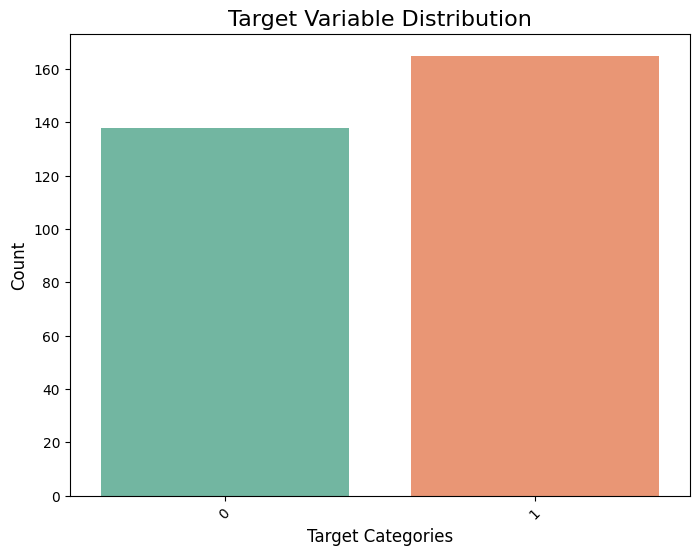

In [22]:
# Ensure that there are no missing values in the target column
print(dataset["target"].isnull().sum())  # Check for NaN values

# Plot the count of target categories
plt.figure(figsize=(8, 6))  # Adjust the plot size
sns.countplot(x=dataset["target"], palette="Set2")  # Use a different color palette

# Set title and labels
plt.title('Target Variable Distribution', fontsize=16)
plt.xlabel('Target Categories', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Rotate x-axis labels for better readability (if too many categories)
plt.xticks(rotation=45)

plt.show()

# Print the counts of each category for reference
target_temp = dataset.target.value_counts()

In [16]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


#We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features

analyising 'sex'

<Axes: xlabel='sex', ylabel='target'>

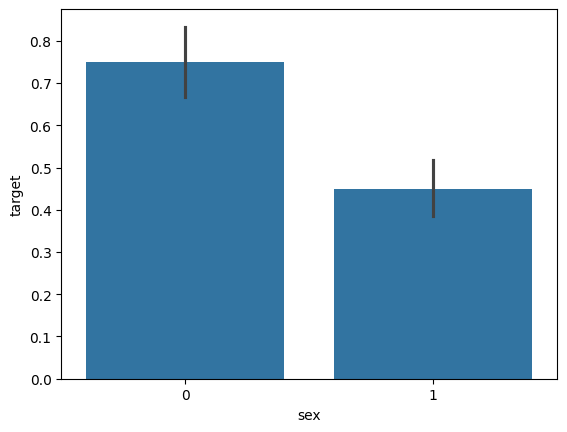

In [31]:
dataset["sex"].unique()
#sns.countplot(x=dataset["sex"], palette="Set2")  # Use a different color palette
sns.barplot(x=dataset["sex"], y=dataset["target"])


females are more likely

Analysing 'Chest Pain Type' feature

<Axes: xlabel='cp', ylabel='target'>

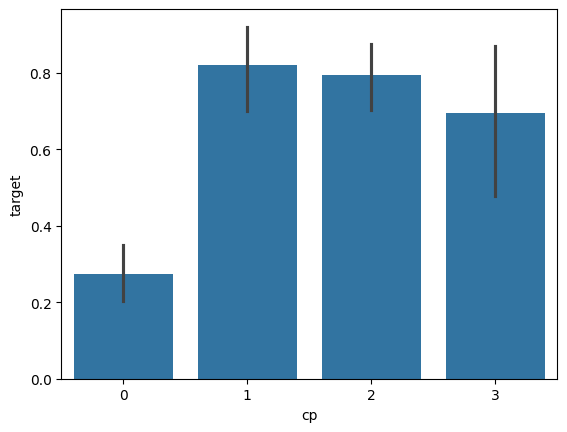

In [30]:
dataset["cp"].unique()


sns.barplot(x=dataset["cp"], y=dataset["target"])


'fbs'

<Axes: xlabel='fbs', ylabel='target'>

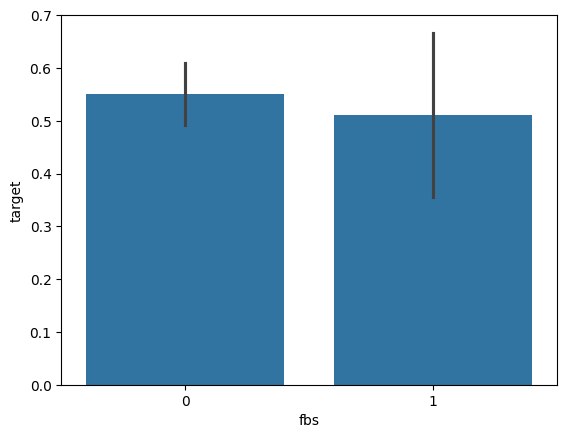

In [32]:
dataset["fbs"].unique()


sns.barplot(x=dataset["fbs"], y=dataset["target"])


'restecg'

<Axes: xlabel='restecg', ylabel='target'>

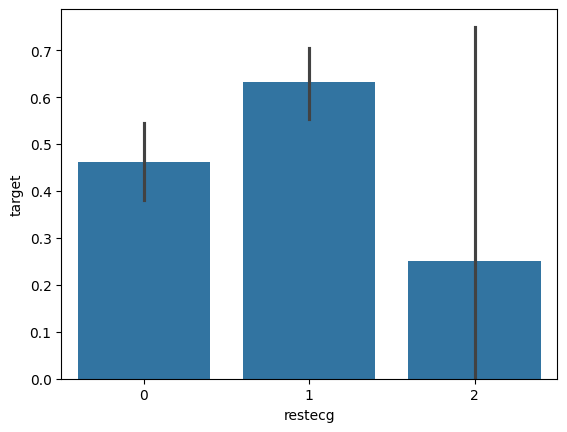

In [33]:
dataset["restecg"].unique()


sns.barplot(x=dataset["restecg"], y=dataset["target"])


'exang'

<Axes: xlabel='exang', ylabel='target'>

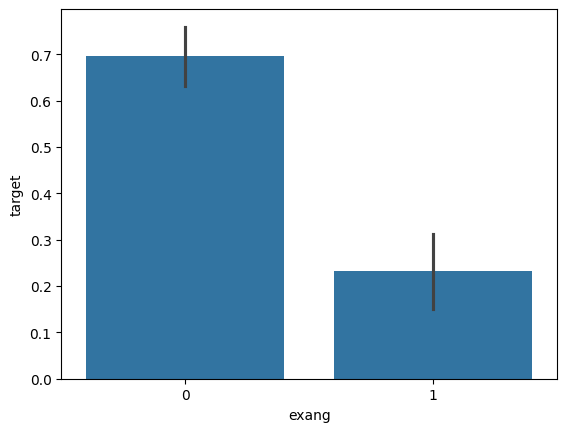

In [34]:
dataset["exang"].unique()


sns.barplot(x=dataset["exang"], y=dataset["target"])


induced angina(1) is less likely

'slope'

<Axes: xlabel='slope', ylabel='target'>

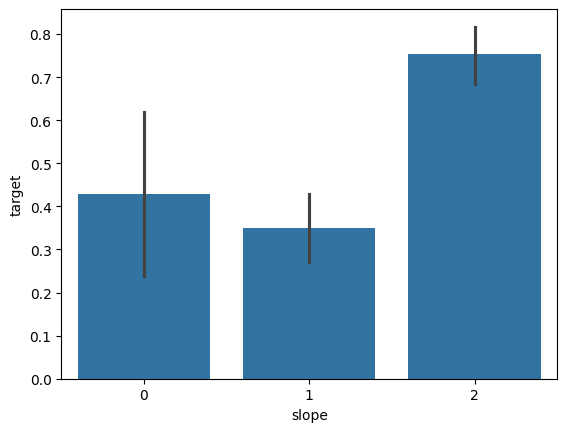

In [35]:
dataset["slope"].unique()


sns.barplot(x=dataset["slope"], y=dataset["target"])

'ca'

<Axes: xlabel='ca', ylabel='target'>

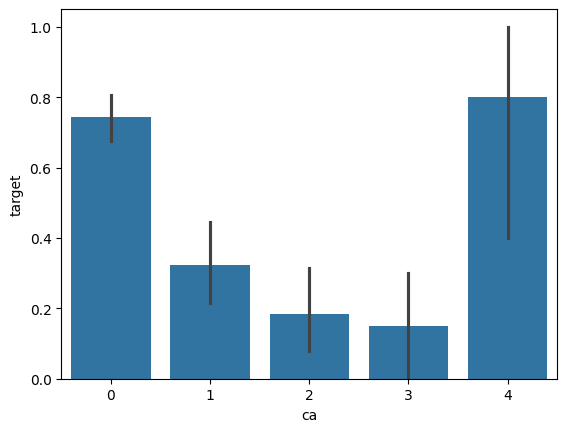

In [36]:
dataset["ca"].unique()


sns.barplot(x=dataset["ca"], y=dataset["target"])

ca =4 has big portion of heart patients

'thal' feature

<Axes: xlabel='thal', ylabel='target'>

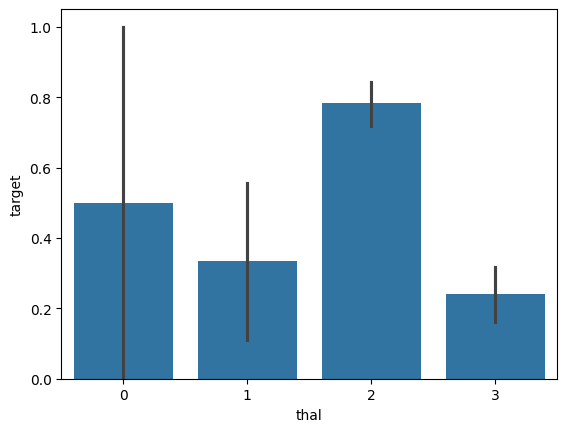

In [37]:
dataset["thal"].unique()


sns.barplot(x=dataset["thal"], y=dataset["target"])

#splitting test-train data

In [38]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

shapes

In [40]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(242, 13)
(242,)
(61, 13)
(61,)


#Fitting model

In [41]:
from sklearn.metrics import accuracy_score

# Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [43]:
Y_pred_lr.shape

(61,)

In [44]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


# Naive Bayes

In [45]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [46]:
Y_pred_nb.shape

(61,)

In [47]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


SVM

In [48]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [49]:
Y_pred_svm.shape

(61,)

In [50]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 81.97 %


# K nearest neighbors

In [51]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)
Y_pred_knn.shape

(61,)

In [52]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 67.21 %


# Decision Tree

It involves training a DecisionTreeClassifier model multiple times with different random states to find the one that provides the best accuracy.

max_accuracy = 0
Explanation:
This initializes the variable max_accuracy to 0. This variable will be used to store the highest accuracy observed during the training process.
It will keep track of the best accuracy found across multiple iterations with different random states.

In [53]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [55]:
print(Y_pred_dt.shape)

score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

(61,)
The accuracy score achieved using Decision Tree is: 81.97 %


# Random forest

In [63]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(200):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)
Y_pred_rf.shape

(61,)

In [65]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using random forest Tree is: "+str(score_rf)+" %")

The accuracy score achieved using random forest Tree is: 88.52 %


# XG Boost

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters:  {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best Cross-Validation Accuracy:  83.07 %
The accuracy score achieved using XGBoost after tuning is: 83.61 %
Confusion Matrix:
 [[20  7]
 [ 3 31]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.74      0.80        27
           1       0.82      0.91      0.86        34

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.83        61



<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

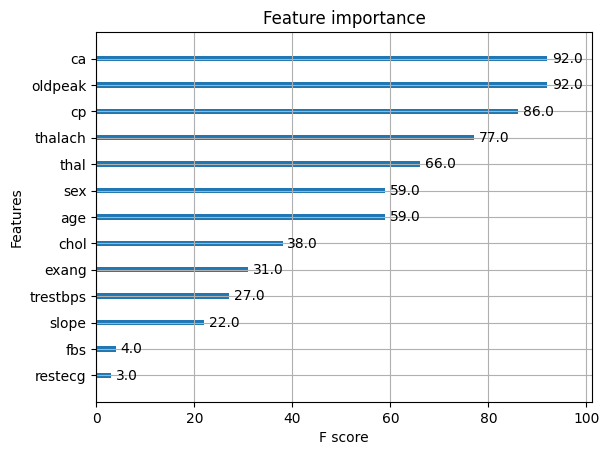

In [61]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Set up the initial XGBoost model
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

# Define a hyperparameter grid for tuning
param_grid = {
    'max_depth': [3, 6, 9],           # Maximum depth of a tree
    'learning_rate': [0.01, 0.1, 0.2], # Learning rate (step size shrinkage)
    'n_estimators': [50, 100, 200],    # Number of trees (boosting rounds)
    'subsample': [0.8, 1],             # Subsample ratio of the training instance
    'colsample_bytree': [0.8, 1],      # Subsample ratio of columns when constructing each tree
}

# Set up GridSearchCV with cross-validation (3-fold)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1, verbose=1)

# Train the model with GridSearchC
grid_search.fit(X_train, Y_train, verbose=False)

# Retrieve the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters: ", best_params)
print("Best Cross-Validation Accuracy: ", round(best_score * 100, 2), "%")

# Re-train the model with the best parameters
xgb_best_model = xgb.XGBClassifier(**best_params, objective="binary:logistic", random_state=42)
xgb_best_model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred_xgb = xgb_best_model.predict(X_test)

# Evaluate model performance
accuracy_xgb = round(accuracy_score(Y_pred_xgb, Y_test) * 100, 2)
print("The accuracy score achieved using XGBoost after tuning is: "+str(accuracy_xgb)+" %")

# Display confusion matrix and classification report
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred_xgb))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred_xgb))

# Feature importance plot
xgb.plot_importance(xgb_best_model)

# neural network

In [67]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train,Y_train,epochs=300)

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5285 - loss: 14.0529
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5479 - loss: 6.8696 
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5687 - loss: 1.6404  
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5539 - loss: 1.9567  
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6481 - loss: 1.0432  
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6361 - loss: 1.1228  
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6519 - loss: 0.8910  
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6523 - loss: 0.9235  
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6192 - loss: 0.9690  
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6540 - loss: 0.8869  
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6475 - loss: 0.8261 
Epoch 12/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.62

In [69]:
Y_pred_nn = model.predict(X_test)
Y_pred_nn.shape

rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

#Note: Accuracy of 85% can be achieved on the test set, by setting epochs=2000, and number of nodes = 11.

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
The accuracy score achieved using Neural Network is: 80.33 %


# All Scores for all models

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using Support Vector Machine is: 81.97 %
The accuracy score achieved using K-Nearest Neighbors is: 67.21 %
The accuracy score achieved using Decision Tree is: 81.97 %
The accuracy score achieved using Random Forest is: 88.52 %
The accuracy score achieved using XGBoost is: 83.61 %
The accuracy score achieved using Neural Network is: 80.33 %


<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

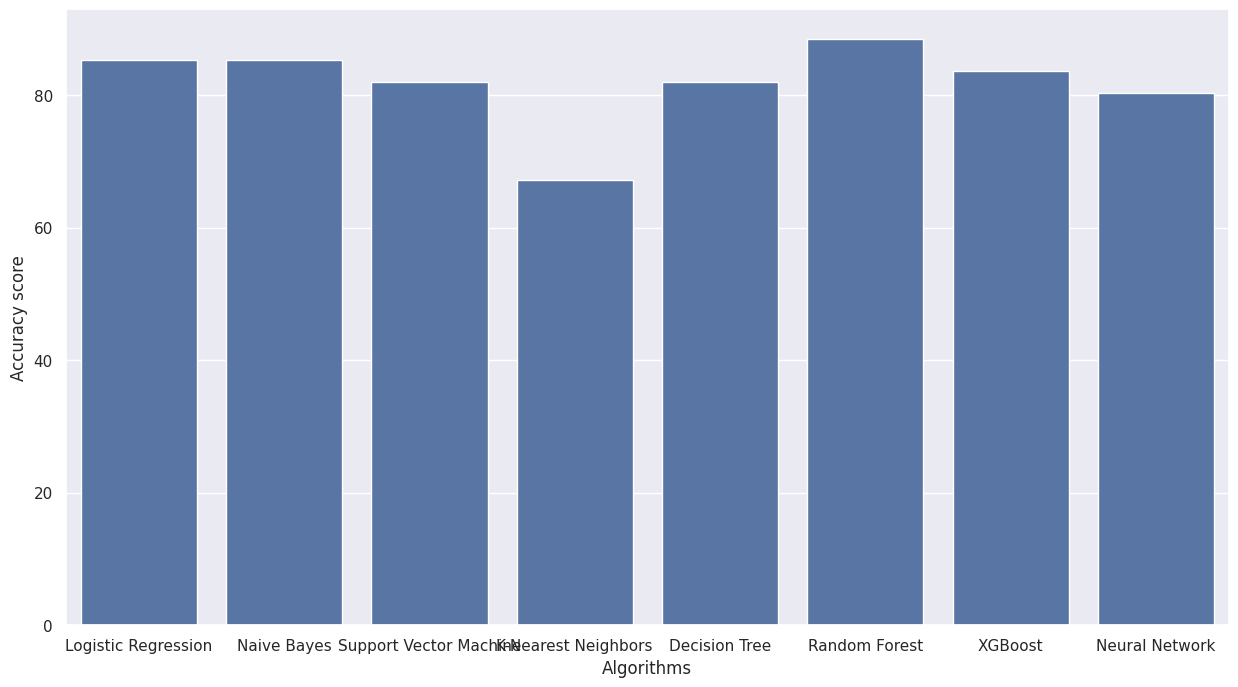

In [74]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,accuracy_xgb,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms,y=scores)

# Best one, we got is Random Forest Tree